<a href="https://colab.research.google.com/github/MikeDeecode/glass_classification_UCL/blob/master/glass_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**USING CLASSIFICATION ALGORITHM TO CLASSIFY GLASSES INTO GLASS TYPES BASED ON THEIR COMPONENTS**

Import the required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print("Setuo complete")

Setuo complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load the data 

In [2]:
glass_data = pd.read_csv("/content/glass-data.csv")
print("Success")

Success


Explore the data

In [3]:
glass_data.shape

(214, 10)

* There are 214 samples of glasses in the dataset 

In [4]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**DESCRIPTION OF THE DATASET**

1. **RI** -  refractive index
2. **Na** -  Sodium percentage
3. **Mg** -  Magnesium percentage
4. **Al** - Aluminum percentage
5. **Si** - Silicon percentage
6. **K** - Potassium percentage
7. **Ca** - Calcium percentage
8. **Ba** - Barium percentage
9. **Fe** - Iron percentage
10. **Type** - Type of glass
    * 1 - building windows (float processed) 
    * 2 - building windows (non-float processed) 
    * 3 - vehicle windows (float processed)
    * 5 - containers
    * 6 - tableware
    * 7 - headlamps


In [5]:
type_grp = glass_data.groupby('Type', as_index = False)['RI'].count()
type_grp.rename(columns = {'RI': "Number of glasses"}, inplace = True)
type_grp

,Type,Number of glasses
0,1,70
1,2,76
2,3,17
3,5,13
4,6,9
5,7,29


* There are seven (7) types of glasses in the dataset 
* Type 2 has the highest number of flass samples 

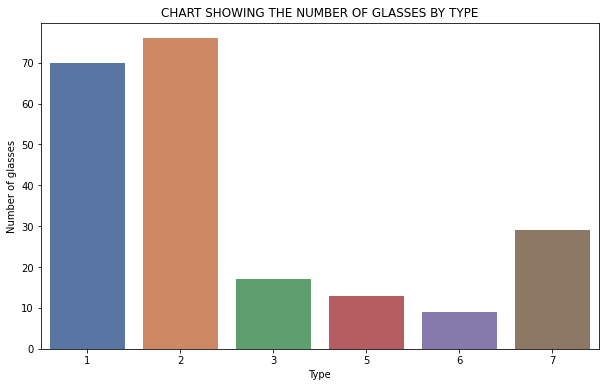

In [6]:
plt.figure(figsize = (10, 6))
sns.countplot('Type', data = glass_data, palette = 'deep')
plt.title("CHART SHOWING THE NUMBER OF GLASSES BY TYPE")
plt.ylabel("Number of glasses")
plt.show()

Let us rename the types to enable us visulise our analysis for better feature selection

In [7]:
glass_data['Type'] = glass_data['Type'].map({1: 'Building windows F', 2: 'Building windows N.F', 3: 'Vehicle windows',
                                             4: 'containers', 5: 'tableware', 6:'headlamps'})

In [8]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,Building windows F
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,Building windows F
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,Building windows F
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,Building windows F
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,Building windows F


##REFRACTIVE INDEX (RI)

**REFRACTIVE INDEX AND TYPE OF GLASS**

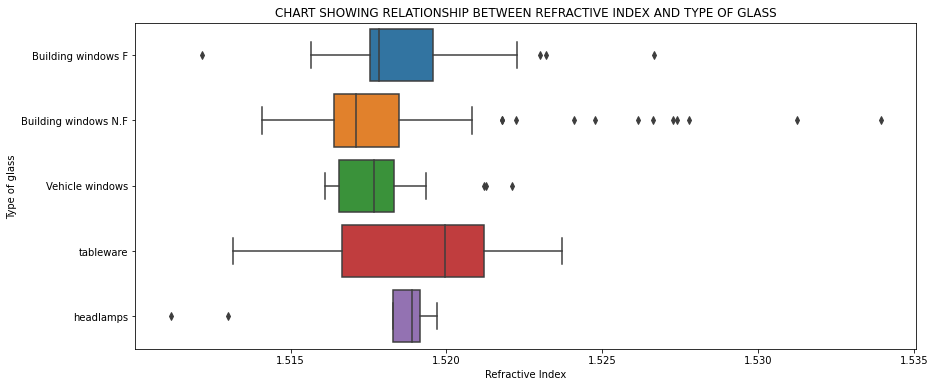

In [9]:
plt.figure(figsize = (14, 6))
sns.boxplot('RI', 'Type', data = glass_data)
plt.title("CHART SHOWING RELATIONSHIP BETWEEN REFRACTIVE INDEX AND TYPE OF GLASS")
plt.xlabel("Refractive Index")
plt.ylabel("Type of glass")
plt.show()

* Refractive index does not seem to affect the type of the glass much 

##PERCENTAGE OF SODIUM (Na)

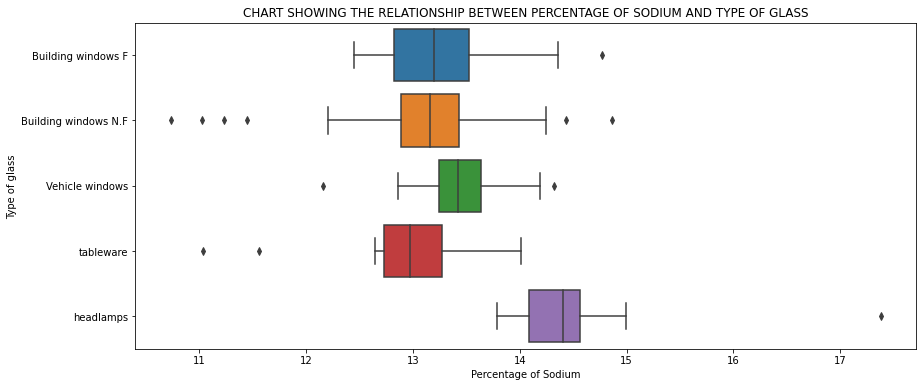

In [10]:
plt.figure(figsize = (14, 6))
sns.boxplot('Na', 'Type', data = glass_data)
plt.title("CHART SHOWING THE RELATIONSHIP BETWEEN PERCENTAGE OF SODIUM AND TYPE OF GLASS")
plt.xlabel("Percentage of Sodium")
plt.ylabel("Type of glass")
plt.show()

* The percentage of Sodium affects the Type of the glass 